# Monte Carlo example

In [1]:
# Add PyTwoWay to system path, do not run this
import sys
sys.path.append('../../..')

In [2]:
# Import the PyTwoWay package
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw
import bipartitepandas as bpd
import numpy as np

## First, check out parameter options

In [3]:
print('----- Simulation -----')
bpd.sim_params().describe_all()
print('----- FE -----')
tw.fe_params().describe_all()
print('----- CRE -----')
tw.cre_params().describe_all()
print('----- Clustering -----')
bpd.cluster_params().describe_all()
print('----- Cleaning -----')
bpd.clean_params().describe_all()

----- Simulation -----
KEY: 'n_workers'
CURRENT VALUE: 10000
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10000) Number of workers.
        
KEY: 'n_time'
CURRENT VALUE: 5
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=5) Time length of panel.
        
KEY: 'firm_size'
CURRENT VALUE: 50
VALID VALUES: one of type (<class 'float'>, <class 'int'>)
CONSTRAINTS: '> 0'
DESCRIPTION: 
            (default=50) Average observations per firm per time period.
        
KEY: 'nk'
CURRENT VALUE: 10
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10) Number of firm types.
        
KEY: 'nl'
CURRENT VALUE: 5
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=5) Number of worker types.
        
KEY: 'alpha_sig'
CURRENT VALUE: 1
VALID VALUES: one of type (<class 'float'>, <class 'int'>)
CONSTRAINTS: '>= 0'
DESCRIPTION:

## Second, set parameter choices

In [4]:
# Set parameters
nl = 5 # Number of worker types
nk = 10 # Number of firm types
sim_params = bpd.sim_params({
    'n_workers': 1000,
    'nl': nl, 'nk': nk,
    'firm_size': 5,
    'alpha_sig': 2, 'w_sig': 2,
    'c_sort': 1.5, 'c_netw': 1.5,
    'p_move': 0.1
})
fe_params = tw.fe_params({'he': True, 'lev_threshold_obs': 1, 'weighted': True})
cre_params = tw.cre_params()
kmeans = bpd.grouping.KMeans(n_clusters=nk)
cluster_params = bpd.cluster_params({'grouping': kmeans})
clean_params = bpd.clean_params({'verbose': False})

## Third, run the Monte Carlo simulation using the parameter choices

In [5]:
# Create the TwoWayMonteCarlo object
twmc = tw.MonteCarlo(
    sim_params=sim_params,
    fe_params=fe_params,
    cre_params=cre_params,
    cluster_params=cluster_params,
    clean_params=clean_params,
    collapse=True, # If True, run estimators on data collapsed at the worker-firm spell level
    move_to_worker=False, # If True, each move is treated as a new worker
    log=False # If True, will create log file(s)
)
# Run the Monte Carlo estimation
twmc.monte_carlo(
    N=500, # Number of simulations
    ncore=4, # Number of cores to use
    rng=np.random.default_rng(1234) # NumPy random number generator. This overrides the random number generators for simulating, FE, and CRE.
)

100%|██████████| 5/5 [00:00<00:00, 21.08it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 62.11it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 94.44it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be

100%|██████████| 5/5 [00:00<00:00, 64.69it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 70.87it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 35.89it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(

../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 40%|████      | 2/5 [00:00<00:00, 12.48it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 71.77it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) t

100%|██████████| 5/5 [00:00<00:00, 48.31it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 111.61it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 40%|████      | 2/5 [00:00<00:00, 19.23it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(

100%|██████████| 5/5 [00:00<00:00, 27.70it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 107.14it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 103.04it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 dra

100%|██████████| 5/5 [00:00<00:00, 86.40it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 3 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 81.18it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 51.65it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum

  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 211.21it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 5 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analy

100%|██████████| 5/5 [00:00<00:00, 178.85it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 77.46it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will 

100%|██████████| 5/5 [00:00<00:00, 91.25it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 172.50it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with 

100%|██████████| 5/5 [00:00<00:00, 119.95it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 166.93it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with

 33%|█████████████▋                           | 167/500 [02:36<02:47,  1.99it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 71.47it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 94.05it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii a

100%|██████████| 5/5 [00:00<00:00, 134.95it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 5 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These w

100%|██████████| 5/5 [00:00<00:00, 103.00it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 80%|████████  | 4/5 [00:00<00:00, 33.69it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 49.99it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(

../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 46.62it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 160.42it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 4 batch(es)

100%|██████████| 5/5 [00:00<00:00, 121.48it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 58.56it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/ar

  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 124.29it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 46.37it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with 

100%|██████████| 5/5 [00:00<00:00, 22.64it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 4 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 39.24it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 124.67it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, th

100%|██████████| 5/5 [00:00<00:00, 128.75it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 155.58it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with

100%|██████████| 5/5 [00:00<00:00, 158.49it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 55.15it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 6 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 125.01it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 dra

  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 132.65it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 65%|██████████████████████████▌              | 324/500 [04:36<01:47,  1.64it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, 

100%|██████████| 5/5 [00:00<00:00, 86.20it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 72.75it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are

100%|██████████| 5/5 [00:00<00:00, 117.51it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 78.67it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 78.24it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw

100%|██████████| 5/5 [00:00<00:00, 128.67it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 56.99it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 80.23it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw

100%|██████████| 5/5 [00:00<00:00, 110.18it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 123.79it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 130.90it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 dr

100%|██████████| 5/5 [00:00<00:00, 63.15it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 141.66it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 4 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 111.78it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maxim

 84%|██████████████████████████████████▎      | 419/500 [05:47<01:29,  1.11s/it]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 124.36it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 88.41it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of 

  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 40.58it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es) to get below the threshold of 1 bad observations.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 64.04it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are

../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 34.03it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 110.47it/s]
../../../pytwoway/fe.py:1290: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. There is/are 0 observation(s) with Pii above this threshold. These will be recomputed analytically. It took 5 batch(es)

100%|██████████| 5/5 [00:00<00:00, 127.42it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 137.23it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 67.87it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 dra

  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  0%|          | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|██████████| 5/5 [00:00<00:00, 27.73it/s]
../../../pytwoway/fe.py:1294: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 5 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 1 draw(s) with Pii above 

## Finally, plot histograms of parameter estimates (histograms show the difference from the truth)

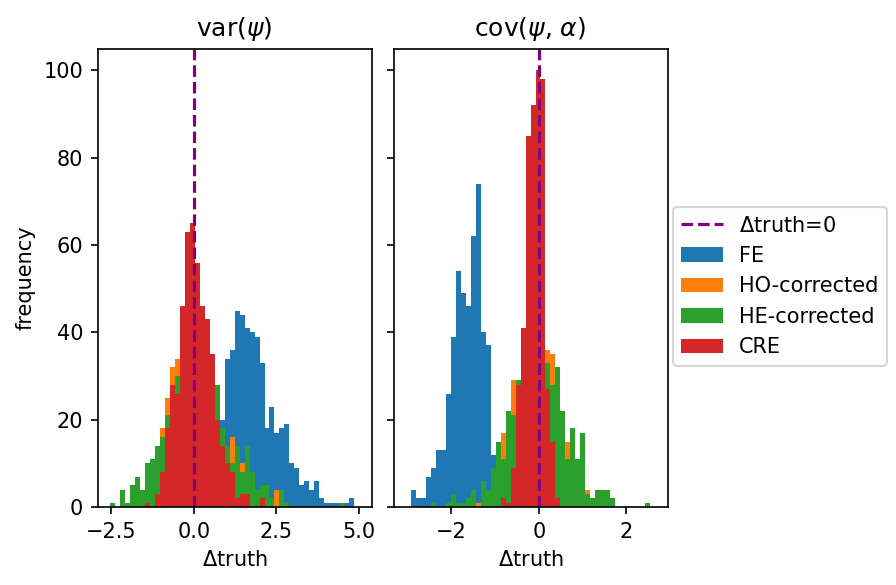

In [6]:
twmc.hist()